# **THE SPARKS FOUNDATION**
# Data Science & Business Analytics Internship
# By Kamran khan
# Task 1: Prediction Using Supervised Machine Learning
## Predict the Percentage of an Student based on the No. of Study Hours.
## What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing Necessary Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

### Loading the Dataset 

In [17]:
df=pd.read_csv('student_data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Preprocessing data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Calculating some statistical data

In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking the Null values in the dataset**

In [20]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Shape of the Dataset**

In [21]:
df.shape

(25, 2)

#### Creating feature and target arrays

In [22]:
X = df.Hours.values
y = df.Scores.values

In [23]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

**Reshaping**

In [24]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [40]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

### Plotting Hours vs Scores

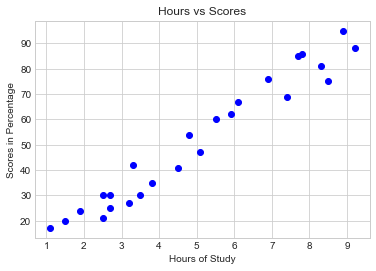

In [26]:
plt.title("Hours vs Scores")
plt.xlabel('Hours of Study')
plt.ylabel('Scores in Percentage')
plt.scatter(X, y, color='b')
plt.show()

### Spliting the Dataset

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 40)

### Training Regression Algorithm

In [44]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Fitting a model
reg.fit(X_train, y_train)

LinearRegression()

### Making Prediction

In [28]:
y_pred=reg.predict(X_test)

### Checking the Accuracy

In [46]:
# Traning Accuracy 
print(f"Traing Accuracy: {reg.score(X_train, y_train)*100}")

# Testing Accuracy
print(f"Testing Accuracy: {reg.score(X_test, y_test)*100}")

Traing Accuracy: 95.04931730009658
Testing Accuracy: 94.66449081971943


### Plotting the regression line

In [47]:
prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1,1)

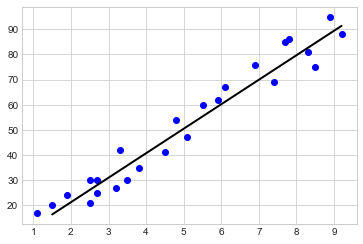

In [48]:
plt.scatter(X, y, color = 'b')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth = 2)
plt.show()

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

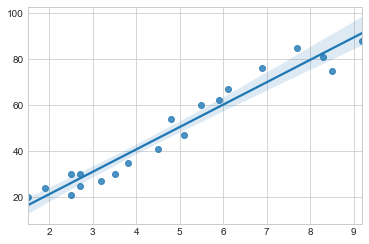

In [32]:
sns.regplot(X_train, y_train)

### Predicting on unlabeled data

In [33]:
hours = np.array([9.25]).reshape(-1,1)

In [34]:
reg.predict(hours)

array([[91.85582532]])

### Making Comparision

In [35]:
y_pred = reg.predict(X_test)
y_pred = list(y_pred)
y_test  =list(y_test)

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

,Actual,Prediction
0,[95],[88.44663283084616]
1,[86],[77.73202787667601]
2,[17],[12.470343155821523]
3,[69],[73.83580789334141]
4,[42],[33.8995530641618]


### Evaluating the model

In [37]:
from sklearn import metrics
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_pred))
print("The R^2 value is : ",reg.score(X_test,y_test))

Mean Squared Error :  44.1652107906905
Mean Absolute Error :  6.457450193167183
The R^2 value is :  0.9466449081971943


# Conclusion:No Of Hours is 9.25 and predicted score is 91.85582532